In [2]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [3]:
weather_df = pd.read_csv("weather_df.csv")
weather_df.drop(columns='Unnamed: 0', inplace=True)
weather_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0
...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0
80,2022,9,23.1,77,89.2,6.2,483.16,0.0
81,2022,10,16.0,65,38.3,4.0,459.57,0.0
82,2022,11,11.8,62,46.7,3.9,336.75,0.0


In [4]:
power_kw_df = pd.read_csv("power_usage.csv")

In [5]:
power_kw_df.drop(columns='Unnamed: 0', inplace=True)
power_kw_df

,year,month,usage
0,2016,1,753434128
1,2016,2,756942825
2,2016,3,714022910
3,2016,4,675078079
4,2016,5,630983018
...,...,...,...
79,2022,8,892014835
80,2022,9,806887743
81,2022,10,691579483
82,2022,11,690524525


In [6]:
kw_df = pd.merge(weather_df, power_kw_df, how='left', on=['year', 'month'])
kw_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,753434128
1,2016,2,3.3,60,45.2,4.5,348.22,5.6,756942825
2,2016,3,8.4,60,55.2,4.1,520.95,0.0,714022910
3,2016,4,15.5,66,185.0,5.8,541.64,0.0,675078079
4,2016,5,19.8,65,104.5,5.2,681.60,0.0,630983018
...,...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0,892014835
80,2022,9,23.1,77,89.2,6.2,483.16,0.0,806887743
81,2022,10,16.0,65,38.3,4.0,459.57,0.0,691579483
82,2022,11,11.8,62,46.7,3.9,336.75,0.0,690524525


In [7]:
kw_df.isnull().sum()

year              0
month             0
temp              0
Humidity_mean     0
rainfall_total    0
cloud             0
solar             0
snow              0
usage             0
dtype: int64

In [8]:
# 데이터 기초통계량 확인
kw_df.describe()
kw_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,753434128
1,2016,2,3.3,60,45.2,4.5,348.22,5.6,756942825
2,2016,3,8.4,60,55.2,4.1,520.95,0.0,714022910
3,2016,4,15.5,66,185.0,5.8,541.64,0.0,675078079
4,2016,5,19.8,65,104.5,5.2,681.60,0.0,630983018
...,...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0,892014835
80,2022,9,23.1,77,89.2,6.2,483.16,0.0,806887743
81,2022,10,16.0,65,38.3,4.0,459.57,0.0,691579483
82,2022,11,11.8,62,46.7,3.9,336.75,0.0,690524525


<AxesSubplot:xlabel='month', ylabel='usage'>

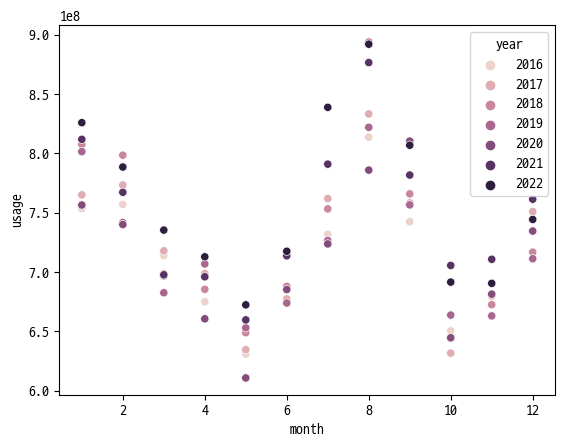

In [9]:
# 산점도
sns.scatterplot(data=kw_df, x = 'month', y = 'usage', hue = 'year')

In [10]:
kw_df.columns

Index(['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'],
      dtype='object')

In [11]:
kw_matrix = kw_df.corr()
kw_matrix = kw_matrix.sort_values(by = 'usage', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix

,usage,Humidity_mean,cloud,rainfall_total,snow,year,temp,month,solar
usage,1.000000,0.331270,0.320904,0.225880,0.204239,1.932979e-01,0.063063,-1.077533e-01,-0.251212
Humidity_mean,0.331270,1.000000,0.759974,0.685070,-0.228311,-5.976416e-04,0.738340,3.562942e-01,0.081978
cloud,0.320904,0.759974,1.000000,0.648221,-0.138775,4.198165e-02,0.542739,5.237492e-02,0.042360
rainfall_total,0.225880,0.685070,0.648221,1.000000,-0.239807,-4.081422e-02,0.610729,1.257373e-01,0.215327
snow,0.204239,-0.228311,-0.138775,-0.239807,1.000000,8.476269e-02,-0.521584,-6.426208e-02,-0.437083
year,0.193298,-0.000598,0.041982,-0.040814,0.084763,1.000000e+00,0.001274,1.769175e-14,0.036816
temp,0.063063,0.738340,0.542739,0.610729,-0.521584,1.273597e-03,1.000000,2.674031e-01,0.660386
month,-0.107753,0.356294,0.052375,0.125737,-0.064262,1.769175e-14,0.267403,1.000000e+00,-0.219640
solar,-0.251212,0.081978,0.042360,0.215327,-0.437083,3.681638e-02,0.660386,-2.196398e-01,1.000000


In [12]:
kw_df.columns

Index(['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'],
      dtype='object')

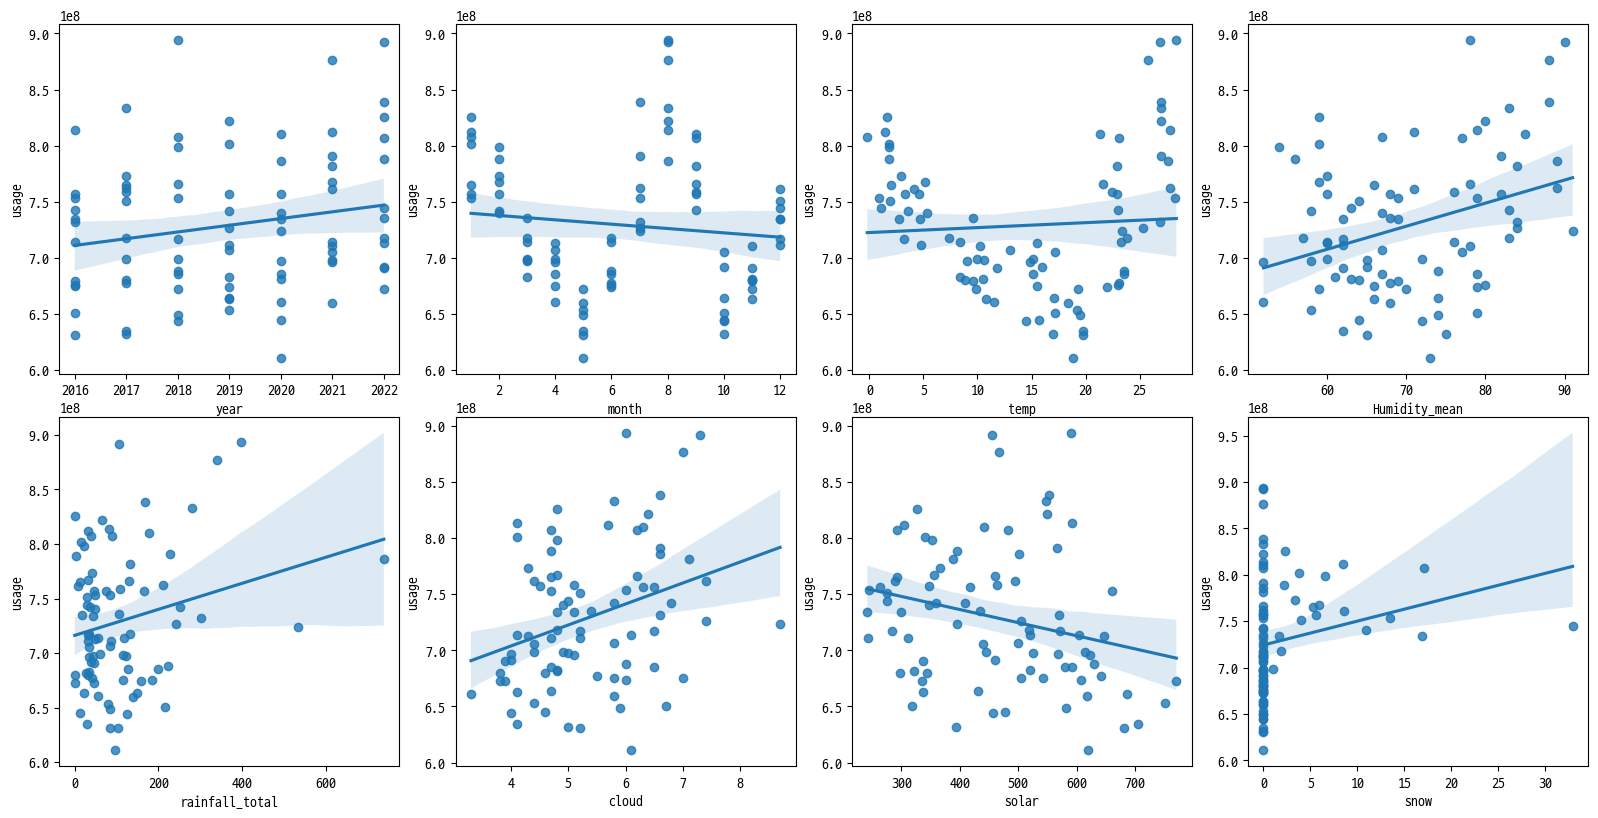

In [13]:
lm_features = ['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
plt.tight_layout()
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'usage', data = kw_df, ax = axs[row][col])

<a id='m1'>월별 kw 중앙값 그래프</a>

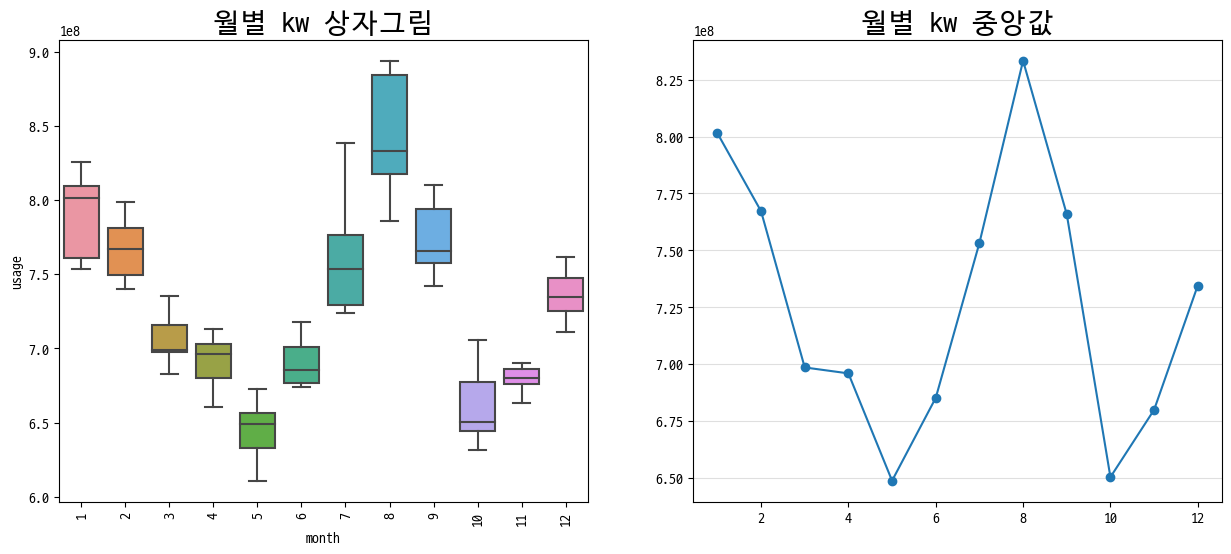

In [14]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="month", y="usage", data=kw_df, showfliers=False)
g.set_title('월별 kw 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(kw_df.groupby('month')['usage'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('월별 kw 중앙값', size = 20)
plt.show()

In [15]:
# 월별 모든년도 kw 중앙값 계산
kw_df_year_month = kw_df.pivot_table(index=['month'], 
                                     columns='year',
                                     values='usage', 
                                     aggfunc='median')

In [16]:
kw_df_year_month

year,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,
1,753434128,765085605,807535917,801473294,756531697,811864417,825882846
2,756942825,773394230,798506369,741798539,740068227,767227407,788536591
3,714022910,717911461,698659795,682608470,696886117,697760777,735401195
4,675078079,698719498,685492936,706906711,660659042,696052225,712892007
5,630983018,634698659,648944709,653101920,610865447,659750505,672419479
6,675463388,677388071,688052097,673982642,685305904,713734602,717565017
7,731854626,761987673,753263260,726580978,723737539,790945617,838798578
8,813713342,833272037,893914829,821995398,785929551,876521082,892014835
9,742389262,758364504,765903998,756642371,810365666,781758101,806887743


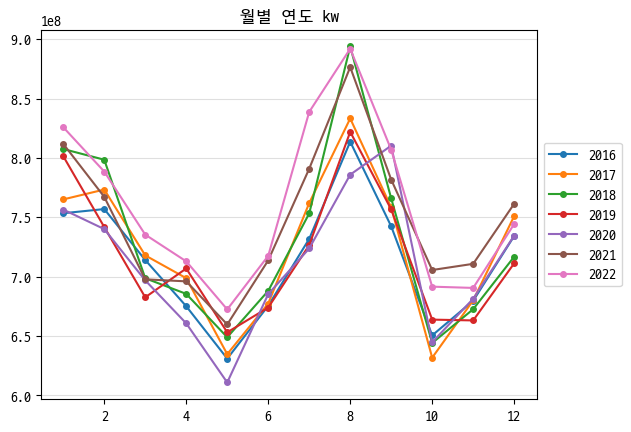

In [17]:
plt.plot(kw_df_year_month, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('월별 연도 kw')
plt.show()

In [18]:
kw_df.head(2)

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,753434128
1,2016,2,3.3,60,45.2,4.5,348.22,5.6,756942825


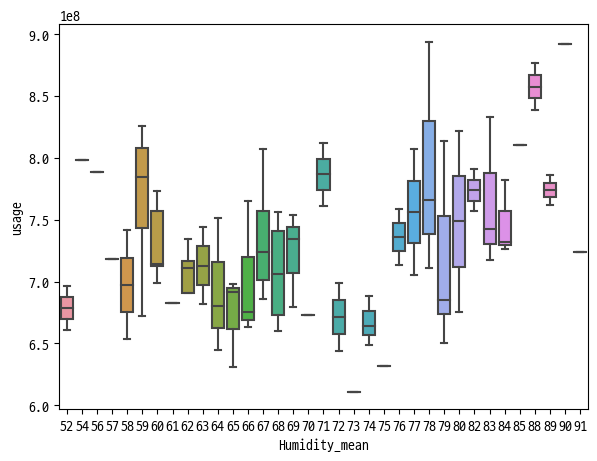

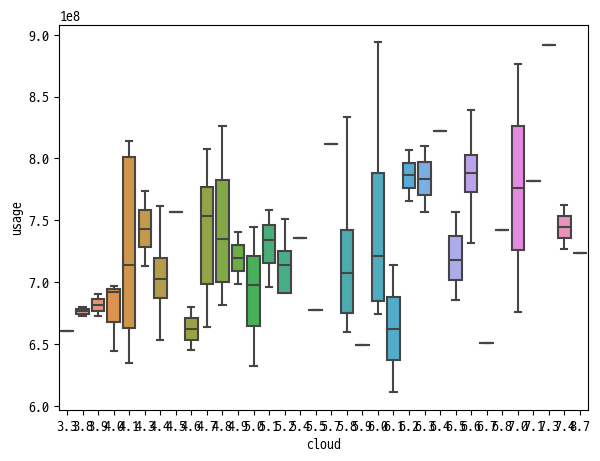

In [19]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='Humidity_mean', y='usage', data = kw_df, showfliers=False)

# # Humidity_mean(평균습도) 별 usage(kw) 중앙값
# medians1 = kw_df.groupby(['Humidity_mean'])['usage'].median().to_dict()

# # # Humidity_mean별 관측치 수
# humidity = kw_df['Humidity_mean'].value_counts().to_dict()

# # # 키 값을 'n: 값' 형식으로 변환
# for key in humidity: humidity[key] = "n: " + str(humidity[key])

# # # 그래프의 Xticks text 값 얻기
# xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# # # tick은 tick의 위치, label은 그에 해당하는 text 값
# for label in ax.get_xticklabels():
#     ax.text(xticks_labels.index(label.get_text()), 
#             medians[label.get_text()] + 0.03, humidity[label.get_text()],
#             horizontalalignment='center', size='large', color='w', weight='semibold')
    
# ax.set_title('humidity_mean(평균습도)별 usage(kw)')

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,2) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='cloud', y='usage', data = kw_df, showfliers=False)

# cloud(운량)) 별 usage(kw) 중앙값
# medians2 = kw_df.groupby(['Humidity_mean'])['usage'].median().astype(str).to_dict()

# # Humidity_mean별 관측치 수
# cloud = kw_df['cloud'].value_counts().to_dict()

# # 키 값을 'n: 값' 형식으로 변환
# for key in cloud: cloud[key] = "n: " + str(cloud[key])

# # 그래프의 Xticks text 값 얻기
# xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# # tick은 tick의 위치, label은 그에 해당하는 text 값
# for label in ax.get_xticklabels():
#     if label.get_text() in medians and label.get_text() in humidity:
#         ax.text(xticks_labels.index(label.get_text()), 
#                 medians[label.get_text()] + 0.03, humidity[label.get_text()],
#                 horizontalalignment='center', size='large', color='w', weight='semibold')
  
# ax.set_title('cloud(운량)별 usage(kw)')

plt.show()

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

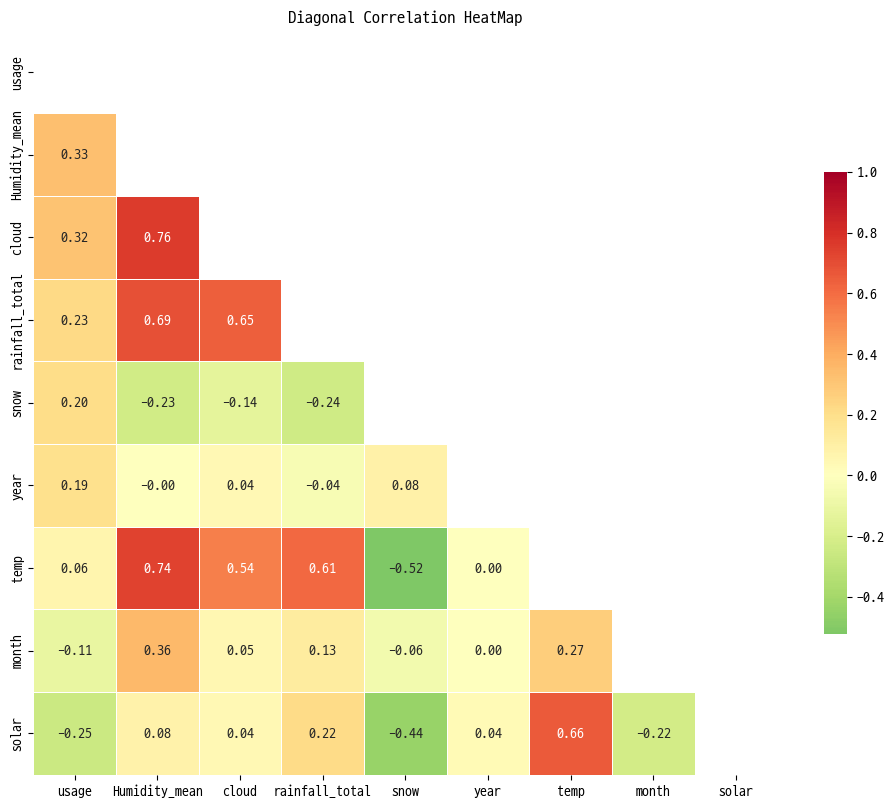

In [21]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_df.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")